# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [24]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [30]:
# Combine the data into a single DataFrame
combined_merge = pd.merge(study_results, mouse_metadata, on=["Mouse ID","Mouse ID"] , how='left')

In [31]:
combined_df = pd.DataFrame(combined_merge)
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [32]:
# Display the data table for preview
combined_df.set_index('Mouse ID', inplace=True)
combined_df.reset_index(inplace=True)
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [33]:
# Checking the number of mice.
num_unique_mice = combined_df["Mouse ID"].nunique()
print(num_unique_mice)

249


In [34]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df, duplicate_mice = combined_df.align(duplicate_mice, axis=1, copy=False)
clean_df = combined_df[~combined_df['Mouse ID'].isin(duplicate_mice['Mouse ID'])]

In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem=clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

drugs_stats=pd.DataFrame({"Mean Tumor Volume":mean,
                                      "Median Tumor Volume":median,
                                      "Tumor Volume Variance":variance,
                                      "Tumor Volume STD":std,
                                      "Tumor Volume SEM":sem})

drugs_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume STD,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err']
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Mice Count')

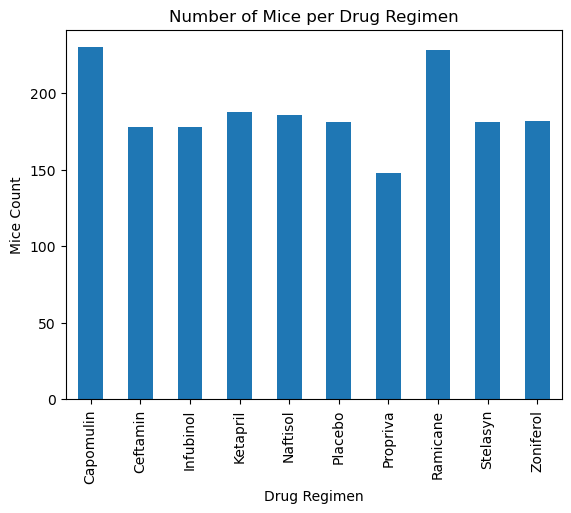

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_plt = clean_df.groupby('Drug Regimen')['Mouse ID'].count()
ax = bar_chart_df = bar_plt.plot(kind='bar',title='Number of Mice per Drug Regimen',stacked=True)

ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Mice Count")

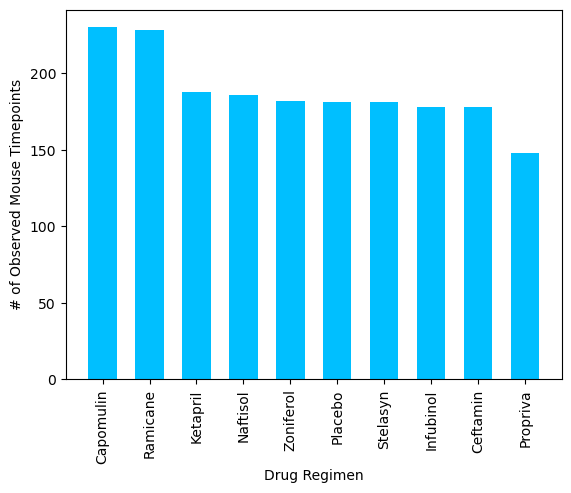

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig = plt.figure()
y=clean_df['Drug Regimen'].value_counts()
y2=y.values
x=y.index.values

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

plt.bar(x,y2,width=.6,color='#00BFFF')
plt.show()


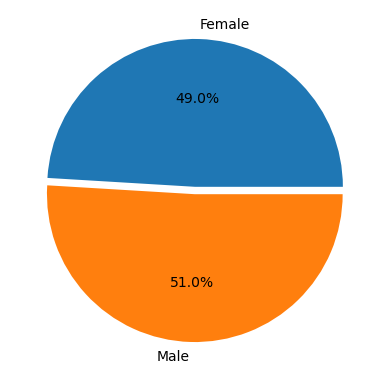

In [59]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_count = clean_df['Sex'].value_counts()
pie_plt = clean_df.groupby('Sex').size()

pie_plt.plot(kind='pie',autopct='%1.1f%%',explode=(0.05, 0))

plt.show()

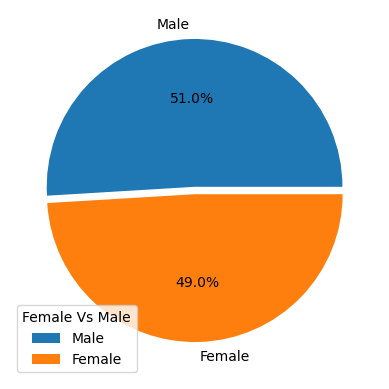

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y=clean_df['Sex'].value_counts()


pielabels=["Male","Female"]
pieexplode = [0.05, 0]

plt.pie(y,labels=pielabels, explode=pieexplode, autopct='%1.1f%%')
plt.legend(title="Female Vs Male")

## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
merg_capo=clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]
merg_rami=clean_df.loc[clean_df["Drug Regimen"]=="Ramicane",:]
merg_infu=clean_df.loc[clean_df["Drug Regimen"]=="Infubinol",:]
merg_cerf=clean_df.loc[clean_df["Drug Regimen"]=="Ceftamin",:]

In [72]:
# Start by getting the last (greatest) timepoint for each mouse
Capomulinmerg=merg_capo.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulinmerg_df=pd.merge(Capomulinmerg,clean_df, on=("Mouse ID","Timepoint"),how="left")
capomulinmerg_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [73]:
maxtum=clean_df.groupby(['Mouse ID'])['Timepoint'].max()
maxtum=maxtum.reset_index()

merg_df=maxtum.merge(clean_df,on=['Mouse ID','Timepoint'],how='left')
merg_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [74]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

for x in treatment_list:
    vol_tumor= merg_df.loc[merg_df['Drug Regimen']==x,"Tumor Volume (mm3)"]
    tumor_vol_list.append(vol_tumor)
    quartile=vol_tumor.quantile([.25,.5,.75])
    lower=quartile[0.25]
    higher=quartile[0.75]
    iqr=higher-lower
    iqrlowerbound=lower- (1.5*iqr)
    iqrhigherbound=higher+(1.5*iqr)
    
    outliners=vol_tumor.loc[(vol_tumor<iqrlowerbound)|(vol_tumor>iqrhigherbound)]
    print(f'{x} outlines: {outliners}')

Capomulin outlines: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outlines: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outlines: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin outlines: Series([], Name: Tumor Volume (mm3), dtype: float64)


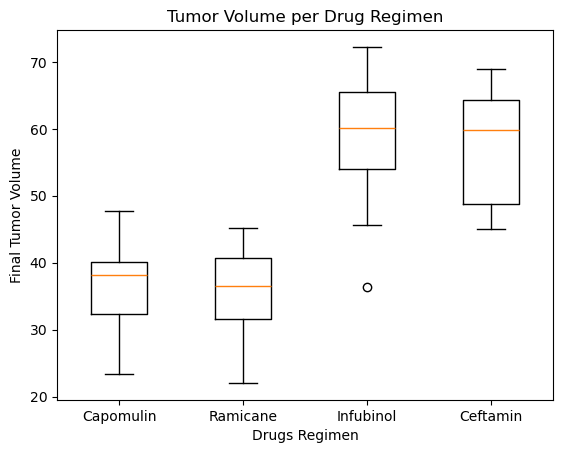

In [77]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = plt.boxplot(tumor_vol_list,labels=treatment_list)

plt.title('Tumor Volume per Drug Regimen')
plt.xlabel('Drugs Regimen')
plt.ylabel('Final Tumor Volume')
plt.show()

## Line and Scatter Plots

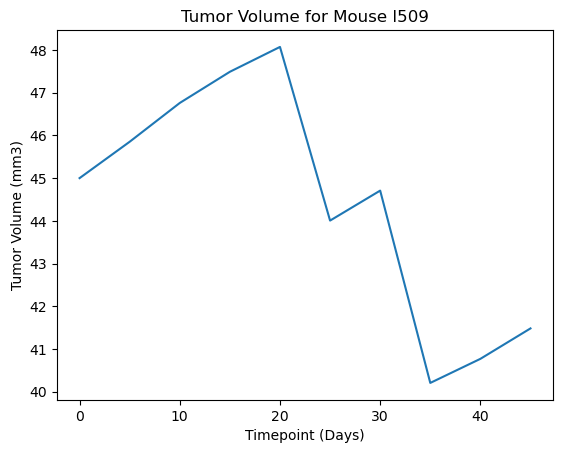

In [83]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
singlemouse = merg_capo.loc[merg_capo["Mouse ID"] == "l509",:]
singlemouse

xl509TP = singlemouse["Timepoint"]
yl509Tumor = singlemouse["Tumor Volume (mm3)"]

plt.title('Tumor Volume for Mouse l509')
plt.plot(xl509TP, yl509Tumor, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

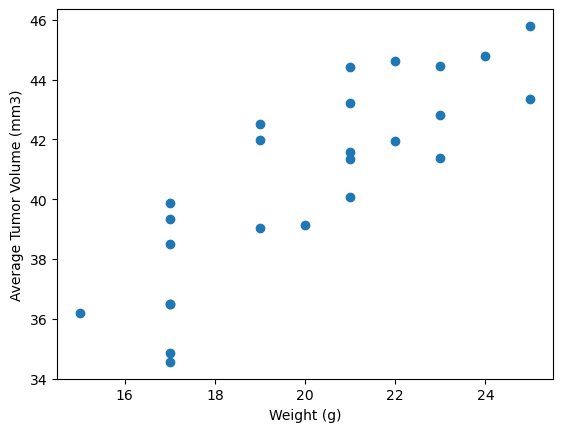

In [85]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avecapomultum = merg_capo.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
avecapomulweig = merg_capo.groupby("Mouse ID")['Weight (g)'].mean()
weightscatter=plt.scatter(avecapomulweig ,avecapomultum,)


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show(weightscatter)

## Correlation and Regression

In [90]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"The correlation coefficient between mouse weight and the average tumor volume is {round(st.pearsonr(avecapomultum,avecapomulweig)[0],2)}")

The correlation coefficient between mouse weight and the average tumor volume is 0.84


In [87]:
lingregress=st.linregress(merg_capo['Weight (g)'],merg_capo['Tumor Volume (mm3)'])
lingregress

LinregressResult(slope=0.9609669432428364, intercept=21.48982721329955, rvalue=0.5256995552077172, pvalue=9.605446629501037e-18, stderr=0.10298279892023661, intercept_stderr=2.075157005491299)

In [88]:
slope=0.960966943242836
intercept=21.489827213299556

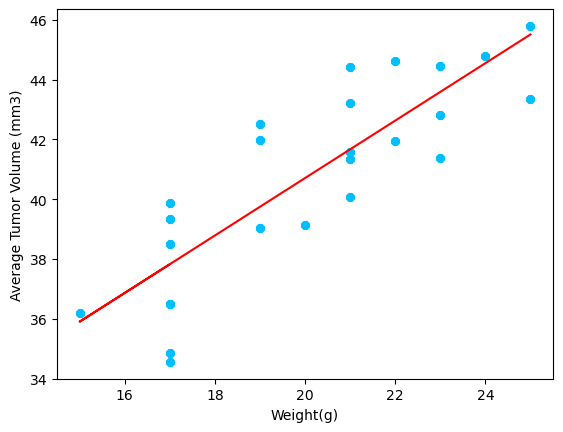

In [91]:
y_values = merg_capo['Weight (g)']*slope+intercept

plt.scatter(avecapomulweig ,avecapomultum,color='#00BFFF',marker="8")
plt.plot(merg_capo['Weight (g)'],y_values,color='red')
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()